### Data Mining

#### Bootstrapping

In [3]:
from matplotlib import pyplot as plt
#import rpy2 as r
import numpy as np
import pandas as pd
import statistics
from numpy import random
from rpy2.robjects import r
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri


In [4]:
#always activate using this syntax
pandas2ri.activate()

In [5]:
co2_r = r['co2']

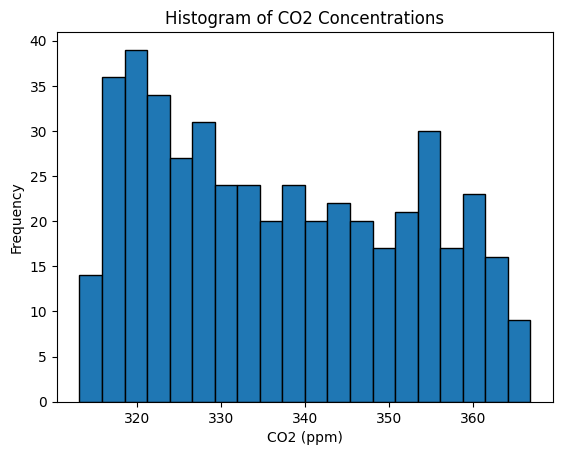

In [6]:
# Convert the R time series object to a pandas DataFrame
co2_py = pd.DataFrame({'co2': list(co2_r), 'time': np.arange(len(co2_r))})

# Plot a histogram of the CO2 values
plt.hist(co2_py['co2'], bins=20, edgecolor='black')
plt.title('Histogram of CO2 Concentrations')
plt.xlabel('CO2 (ppm)')
plt.ylabel('Frequency')
plt.show()

#### Association analysis
- product pairs in grocery stores
- medical conditions: obesity and t2 diab
- car repairs

In [7]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

grocery = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/refs/heads/master/Grocery1.csv")

grocery_1 = pd.get_dummies(grocery["Grocery"])
grocery_2=grocery_1*1
grocery_2["ID"]=grocery["ID"]
grocery_3 = grocery_2.groupby(["ID"]).max()
grocery_4=grocery_3.applymap(bool)

/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T/ipykernel_6334/4197406398.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grocery_4=grocery_3.applymap(bool)


In [8]:
grocery_assoc = apriori(grocery_4, min_support = 0.001, use_colnames = True)

out_rules = association_rules(grocery_assoc,metric = "confidence", min_threshold = 0.6)

out_rules2=out_rules[['antecedents','consequents','support','confidence','lift']]

out_rules2

,antecedents,consequents,support,confidence,lift
0,(butter),(bread),0.272727,1.000000,1.571429
1,(egg),(bread),0.272727,0.600000,0.942857
2,(papaya),(bread),0.363636,0.666667,1.047619
3,(oat packet),(papaya),0.272727,0.750000,1.375000
4,"(egg, butter)",(bread),0.090909,1.000000,1.571429
5,"(butter, milk)",(bread),0.090909,1.000000,1.571429
6,"(butter, papaya)",(bread),0.090909,1.000000,1.571429
7,"(egg, papaya)",(bread),0.090909,1.000000,1.571429
8,"(papaya, milk)",(bread),0.181818,0.666667,1.047619
9,"(bread, milk)",(papaya),0.181818,0.666667,1.222222


### Classification and Regression Trees